In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf;
import datetime as dt;
from pandas_datareader import data as pdr;
import plotly.offline as pyo;
import plotly.graph_objects as gp;
from plotly.subplots import make_subplots;
pyo.init_notebook_mode(connected=True) 


GET STOCK MARKET DATA

In [11]:
end = dt.datetime.now();
start =dt.datetime(2019,5,18);
df = yf.download('TSLA', start, end)['Adj Close'];
df.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-05-20    13.690667
2019-05-21    13.672000
2019-05-22    12.848667
2019-05-23    13.032667
2019-05-24    12.708667
Name: Adj Close, dtype: float64

In [12]:
returns = df.pct_change().dropna()

In [13]:
returns

Date
2019-05-21   -0.001363
2019-05-22   -0.060220
2019-05-23    0.014321
2019-05-24   -0.024861
2019-05-28   -0.010124
                ...   
2023-05-11    0.021004
2023-05-12   -0.023826
2023-05-15   -0.009703
2023-05-16    0.001022
2023-05-17    0.044079
Name: Adj Close, Length: 1006, dtype: float64

In [14]:
returns.var()

0.0018426720475696703

In [15]:
returns.std()

0.04292635609470795

<Axes: xlabel='Date'>

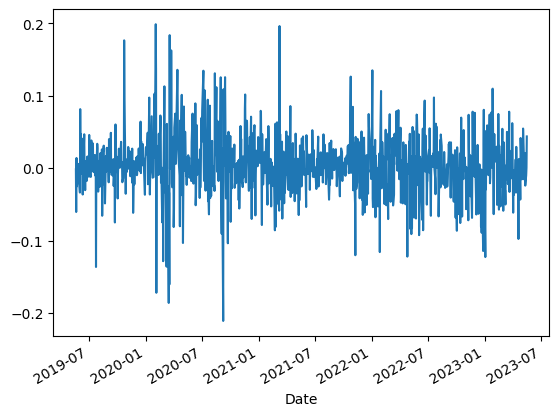

In [10]:
returns.plot()

In [11]:
!pip install --upgrade arch

                                              0.0/852.8 kB ? eta -:--:--
     -                                     41.0/852.8 kB 960.0 kB/s eta 0:00:01
     -----                                  122.9/852.8 kB 1.4 MB/s eta 0:00:01
     ----------                             235.5/852.8 kB 1.8 MB/s eta 0:00:01
     --------------                         317.4/852.8 kB 2.0 MB/s eta 0:00:01
     --------------                         317.4/852.8 kB 2.0 MB/s eta 0:00:01
     -------------------------              573.4/852.8 kB 2.3 MB/s eta 0:00:01
     ------------------------------         675.8/852.8 kB 2.2 MB/s eta 0:00:01
     -------------------------------        706.6/852.8 kB 2.2 MB/s eta 0:00:01
     -------------------------------------  849.9/852.8 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 852.8/852.8 kB 2.1 MB/s eta 0:00:00
                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB

In [18]:
from arch import arch_model

In [19]:
#Volatility GARCH(1,1) Model

model = arch_model(returns, mean = "zero" , vol = "GARCH", p=1 , q=1)

In [20]:
results = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -1011.3043911899646
Iteration:      2,   Func. Count:     14,   Neg. LLF: -1707.780862687392
Iteration:      3,   Func. Count:     22,   Neg. LLF: -1551.489503323442
Iteration:      4,   Func. Count:     28,   Neg. LLF: -1723.8614818315964
Iteration:      5,   Func. Count:     35,   Neg. LLF: -1792.3269818993472
Iteration:      6,   Func. Count:     39,   Neg. LLF: -1792.3502279545737
Iteration:      7,   Func. Count:     43,   Neg. LLF: -1792.3514112763996
Iteration:      8,   Func. Count:     47,   Neg. LLF: -1792.3515663705584
Iteration:      9,   Func. Count:     51,   Neg. LLF: -1792.3516303013346
Iteration:     10,   Func. Count:     54,   Neg. LLF: -1792.3516303022761
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1792.3516303013346
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10


c:\Python311\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001841. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [21]:
# Zero Mean GARCH(1,1) MODEL RESULTS

print(results.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                1792.35
Distribution:                  Normal   AIC:                          -3578.70
Method:            Maximum Likelihood   BIC:                          -3563.96
                                        No. Observations:                 1006
Date:                Thu, May 18 2023   Df Residuals:                     1006
Time:                        13:16:11   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      7.8412e-05  2.925e-05      2.680  7.355e-03 [2.

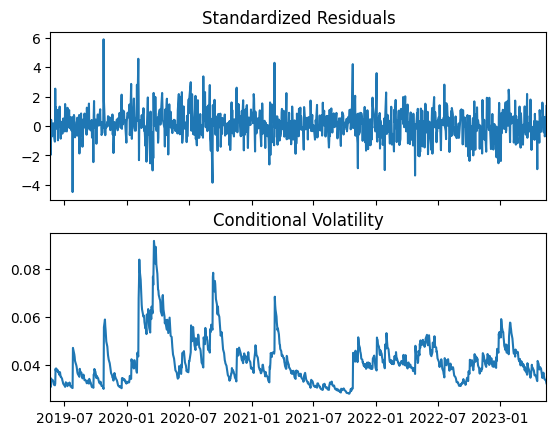

In [22]:
#We plot GARCH(1,1)MLE Model Results

results.plot()
results.plot = results


In [23]:
#Estimate GARCH(1,1)MLE Variance and Volatility

# Gamma = 1 - Alpha - Beta; Omega = Gamma * Vl (Long Term Volatility)
# Vl(Long Term Volatility) = Omega/1- Alpha - Beta 

In [ ]:
# Variance Equation from Results

#(Variance)^2 = 0.0000078412 + 0.0713 + 0.8859 

In [24]:
Gamma = 1 - 0.0713 - 0.8959 
Gamma

0.03279999999999994

In [27]:
Omega = 0.000078412


In [28]:
Omega

7.8412e-05

In [29]:
Long_Term_Volatility = Omega/Gamma

In [30]:
Long_Term_Volatility

0.0023906097560975653

In [33]:
Daily_Volatility = (Long_Term_Volatility)**0.5

In [34]:
Daily_Volatility

0.04889386215157855

In [35]:
#Let´s compare std vs GARCH(1,1)

In [ ]:
# std = 0.042926 vs GARCH(1,1) = 0.048893